# Anomaly Detection Methodology
## Continuous Probabilistic Methods - Exercises

In [1]:
# library imports for these exercises
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Define a function named get_lower_and_upper_bounds that has two arguments. 

The first argument is a pandas Series. 

The second argument is the multiplier, which should have a default argument of 1.5.

In [57]:
def get_lower_and_upper_bounds(s, k=1.5):
    q1, q3 = s.quantile([.25, .75])
    iqr = q3 - q1
    upper_bound = q3 + k * iqr
    lower_bound = q3 - k * irr
    
    return upper_bound, lower_bound

In [58]:
def get_upper_outliers(s, k):
    q1, q3 = s.quantile([.25, .75])
    iqr = q3 - q1
    upper_bound = q3 + k * iqr
    return s.apply(lambda x: max([x - upper_bound, 0]))

In [67]:
def get_lower_outliers(s, k):
    q1, q3 = s.quantile([.25, .75])
    iqr = q3 - q1
    lower_bound = q1 - k * iqr
    return s.apply(lambda x: max([lower_bound - x, 0]))

Using lemonade.csv dataset and focusing on continuous variables

* Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense? Which outliers should be kept?

In [6]:
# read in lemonade csv from weblink
df = pd.read_csv('https://gist.githubusercontent.com/ryanorsinger/19bc7eccd6279661bd13307026628ace/raw/e4b5d6787015a4782f96cad6d1d62a8bdbac54c7/lemonade.csv')

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18
...,...,...,...,...,...,...,...
360,12/27/17,Wednesday,42.7,1.00,33,0.5,19
361,12/28/17,Thursday,37.8,1.25,32,0.5,16
362,12/29/17,Friday,39.5,1.25,17,0.5,15
363,12/30/17,Saturday,30.9,1.43,22,0.5,13


In [21]:
# lower the text in columns for ease of use
df.columns = map(str.lower, df.columns)

# drop the non-continuous columns
df_cont = df.drop(columns=['date', 'day', 'price'])

# preview
df_cont.head()

,temperature,rainfall,flyers,sales
0,27.0,2.00,15,10
1,28.9,1.33,15,13
2,34.5,1.33,27,15
3,44.1,1.05,28,17
4,42.4,1.00,33,18


In [27]:
# summary statistics of data
df.describe().T 

# what insight can be gained from this initial look?

,count,mean,std,min,25%,50%,75%,max
temperature,365.0,61.224658,18.085892,15.1,49.70,61.10,71.70,212.0
rainfall,365.0,0.825973,0.273890,0.4,0.65,0.74,0.91,2.5
flyers,365.0,40.104110,13.786445,-38.0,31.00,39.00,49.00,80.0
price,365.0,0.500000,0.000000,0.5,0.50,0.50,0.50,0.5
sales,365.0,27.865753,30.948132,7.0,20.00,25.00,30.00,534.0


In [33]:
# IQR Range Rule
q1 = df_cont.quantile(.25)
q3 = df_cont.quantile(.75)

iqr = q3 - q1
multiplier = 1.5

lower_bound = q1 - iqr*multiplier
upper_bound = q3 + iqr*multiplier

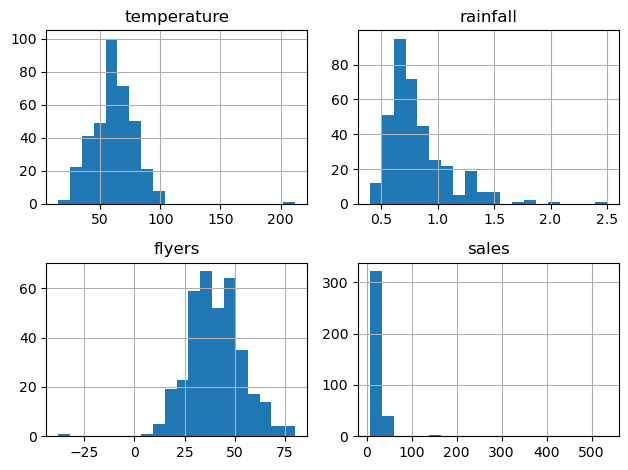

In [42]:
# Visualize distributions of variables
df_cont.hist(bins=20)
plt.tight_layout()

In [53]:
# lower bounds
print('LOWER BOUNDS:\n',lower_bound)

LOWER BOUNDS:
 temperature    16.70
rainfall        0.26
flyers          4.00
sales           5.00
dtype: float64


In [54]:
# unique values within the lower bound
df_cont[df_cont <= lower_bound].nunique()

temperature    1
rainfall       0
flyers         1
sales          0
dtype: int64

In [69]:
# check for lower outliers in temperature
df_cont.temperature[get_lower_outliers(df_cont.temperature, 1.5) != 0]

364    15.1
Name: temperature, dtype: float64

In [70]:
# check for lower outliers in flyers
df_cont.flyers[get_lower_outliers(df_cont.flyers, 1.5) != 0]

324   -38
Name: flyers, dtype: int64

In [72]:
# check for lower outliers in rainfall
df_cont.rainfall[get_lower_outliers(df_cont.rainfall, 1.5) != 0]

Series([], Name: rainfall, dtype: float64)

In [73]:
# check for lower outliers in sales
df_cont.sales[get_lower_outliers(df_cont.sales, 1.5) != 0]

Series([], Name: sales, dtype: int64)

In [77]:
# verify identified flyer row
df_cont[df_cont.flyers < 0]

,temperature,rainfall,flyers,sales
324,47.0,0.95,-38,20


In [78]:
# checking upper for temperature to validate/contextualize lower bound for temperature
df_cont.temperature[get_upper_outliers(df_cont.temperature, 1.5) != 0]

41    212.0
Name: temperature, dtype: float64

* Temperature has one lower outlier - Should be kept?
* Flyers has one lower outlier - Negative Flyers? Should be removed
* Rainfall and Sales do not have lower outliers

Use the IQR Range Rule and the upper and upper bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these upper outliers make sense? Which outliers should be kept?